<a href="https://www.analytiksinc.com">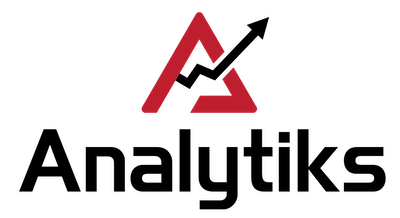</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# K MEANS CLUSTERING

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">**KMeans Clustering**</a>

In [2]:
from sklearn.cluster import KMeans

## Load and Explore the Dataset

In [3]:
#Load the Dataset
df = pd.read_csv('Fleet_data.csv', index_col='Driver_ID')

In [4]:
#View the Dataset
df.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [5]:
#Describe the data
df.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


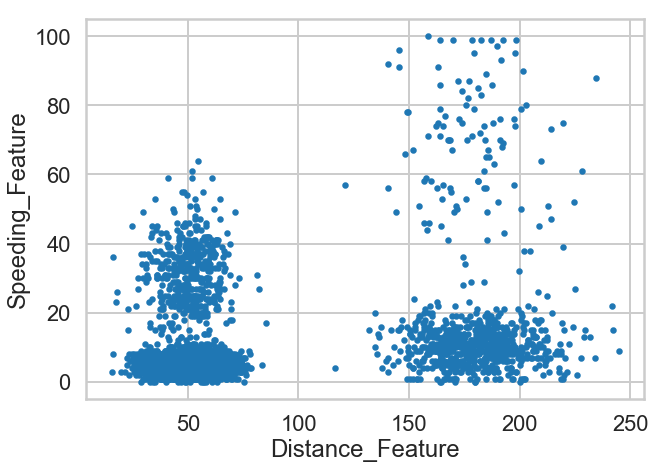

In [6]:
#Plot/Visualize the Data
df.plot(x='Distance_Feature', y='Speeding_Feature',kind='scatter', figsize=(10,7))

## Test with k=3

In [7]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [8]:
#Output of K-Means is the cluster label
k3_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k3 = df.copy()
df_k3['Label'] = k3_labels

In [9]:
#View the dataset
df_k3.head()

,Distance_Feature,Speeding_Feature,Label
Driver_ID,,,
3423311935,71.24,28,1
3423313212,52.53,25,1
3423313724,64.54,27,1
3423311373,55.69,22,1
3423310999,54.58,25,1


### Cluster Analysis

In [10]:
#Check the size of each cluster
df_k3.Label.value_counts()

1    3200
2     696
0     104
Name: Label, dtype: int64

In [11]:
df_k3[(df_k3.Label == 1)].describe()

,Distance_Feature,Speeding_Feature,Label
count,3200.000000,3200.000000,3200.0
mean,50.047634,8.828750,1.0
std,10.124035,10.004159,0.0
min,15.520000,0.000000,1.0
25%,43.290000,4.000000,1.0
50%,50.280000,5.000000,1.0
75%,56.610000,7.000000,1.0
max,85.360000,64.000000,1.0


In [12]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k3, index = ['Label'], values = ['Distance_Feature','Speeding_Feature'], 
               aggfunc=[np.mean,np.min, np.max])

mean                              amin                   \
      Distance_Feature Speeding_Feature Distance_Feature Speeding_Feature   
Label                                                                       
0           177.835096        70.288462           121.07               41   
1            50.047634         8.828750            15.52                0   
2           180.343118        10.520115           116.58                0   

                  amax                   
      Distance_Feature Speeding_Feature  
Label                                    
0               234.52              100  
1                85.36               64  
2               244.79               39

**Example Profiles**<br>
* Cluster_0 = Fast Drivers Travelling Long Distance
* Cluster_1 = Slow Drivers Travelling Short Distance
* Cluster_2 = Slow Drivers Travelling Long Distance 

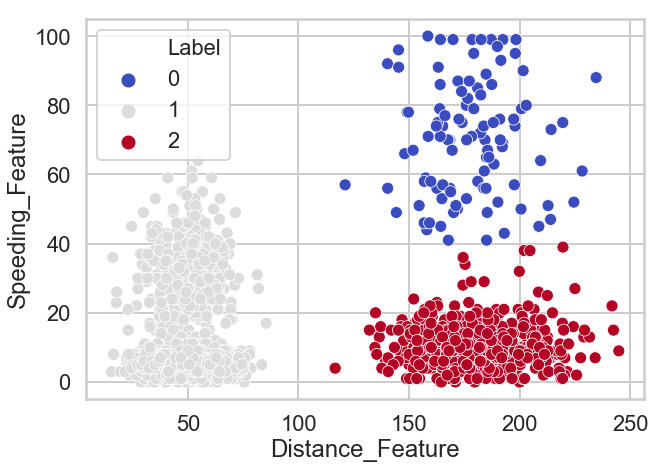

In [18]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3.Distance_Feature, y=df_k3.Speeding_Feature, hue=df_k3.Label, palette='coolwarm')

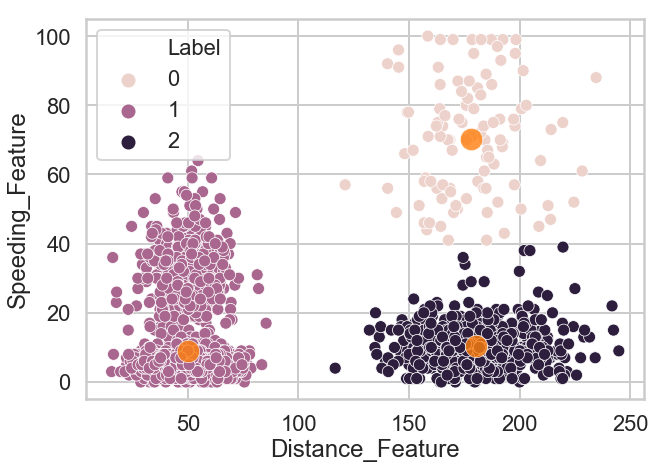

In [14]:
#Visualize the Cluster Centers
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3.Distance_Feature, y=df_k3.Speeding_Feature, hue=df_k3.Label)

centers = kmeans.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8)

## Selecting K

### Elbow Method

**Steps:**<br>
* Run k-means clustering on the dataset for a range of values of k (i.e. k from 1 to 10)
* For each value of k calculate the sum of squared errors (SSE)
* Plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

The SSE can be retreived by accessing the "inertia_" attribute of the KMeans algorithm

In [23]:
#Set range for k
range_n_clusters= [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1) 
    kmeans.fit(df)
    score = kmeans.inertia_
    scores.append(score)
    print(str(i) +"\t" +str(score))

2	1316420.8509477186
3	992634.060670247
4	719601.1096991899
5	534657.9839435444
6	372834.49978851475
7	319748.10231066274
8	276908.1424288762
9	252795.42826054967
10	230421.39651097314
11	209027.23315170204
12	192959.00869051664
13	173266.51569764712
14	159188.4917133025
15	148470.13226225297


Text(0, 0.5, 'Score')

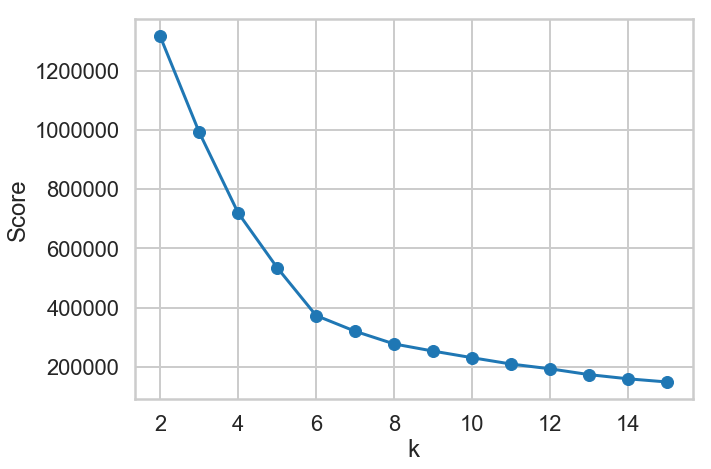

In [24]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

### Silhouette Method

A way to measure how close each point in a cluster is to the points in its neighboring clusters.<br>
Values lies in the range of [-1, 1]
* +1:  indicates that the sample is far away from its neighboring cluster and very close to the cluster its assigned
* -1:  indicates that the point is close to its neighboring cluster than to the cluster its assigned. 
* 0:  means its at the boundary of the distance between the two cluster. 

The higher the value better is the cluster configuration.


In [19]:
#Import the Silhouette Functions from sklearn and colormap from matplotlib
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

The code for silhouette plotting was taken directly from sklearn, can refer to this <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py">link</a> for more details. 

For n_clusters = 2 The average silhouette_score is : 0.8490223286225532
For n_clusters = 3 The average silhouette_score is : 0.8231396834167266
For n_clusters = 4 The average silhouette_score is : 0.5907475009381601
For n_clusters = 5 The average silhouette_score is : 0.5128249233219331
For n_clusters = 6 The average silhouette_score is : 0.4856088914854465
For n_clusters = 7 The average silhouette_score is : 0.45894991458826573
For n_clusters = 8 The average silhouette_score is : 0.4491436425545915
For n_clusters = 9 The average silhouette_score is : 0.44465854910316477
For n_clusters = 10 The average silhouette_score is : 0.43852135824459365
For n_clusters = 11 The average silhouette_score is : 0.4120812436378982
For n_clusters = 12 The average silhouette_score is : 0.41901371897580486
For n_clusters = 13 The average silhouette_score is : 0.41286104206357366
For n_clusters = 14 The average silhouette_score is : 0.4142551795610987
For n_clusters = 15 The average silhouette_score is : 

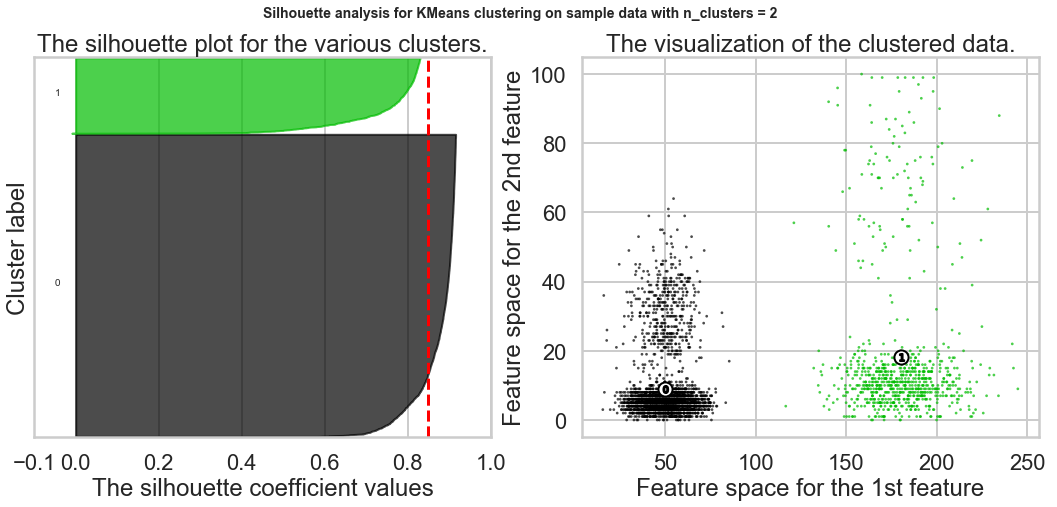

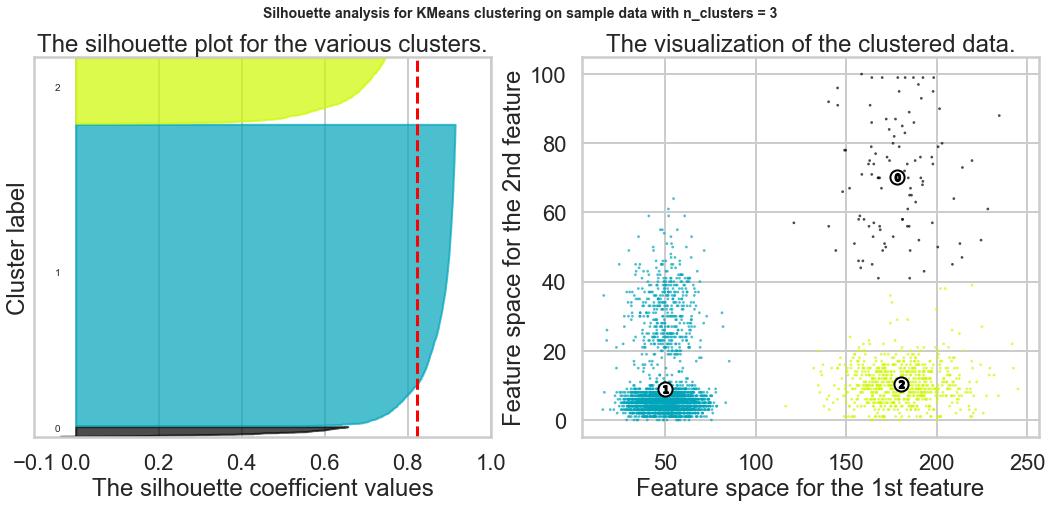

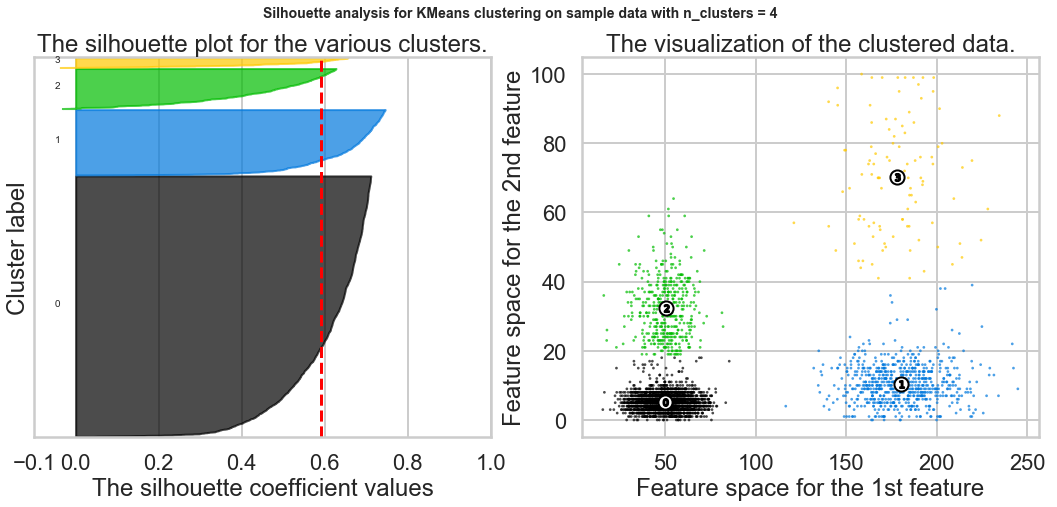

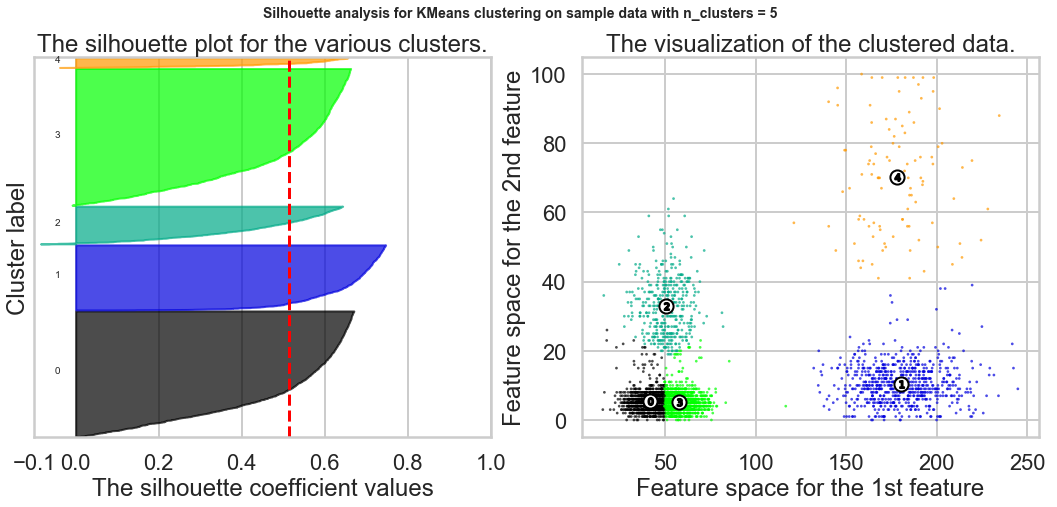

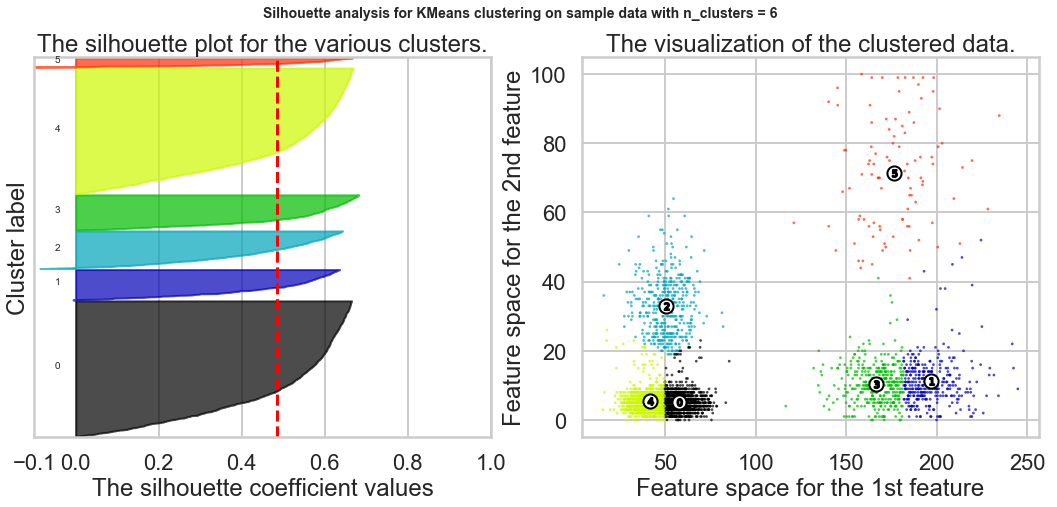

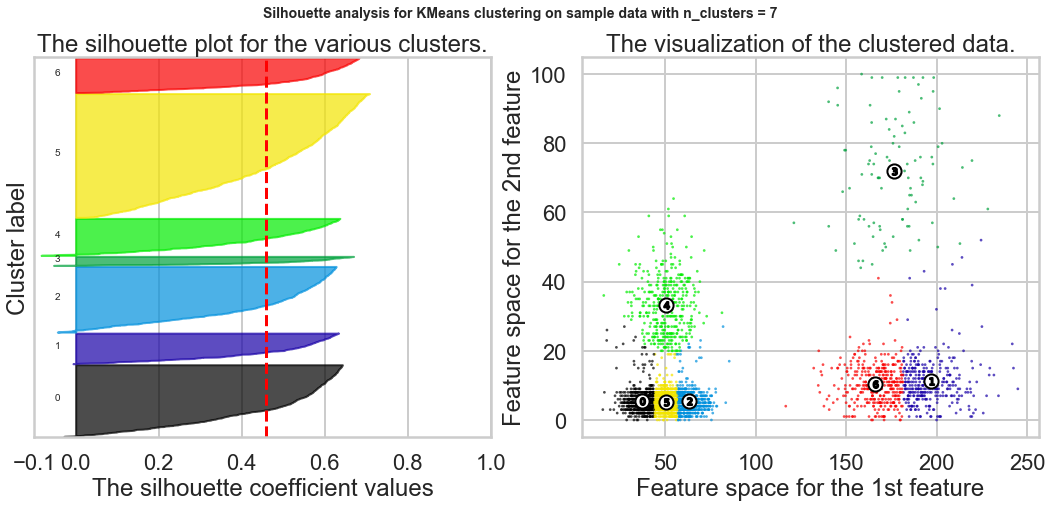

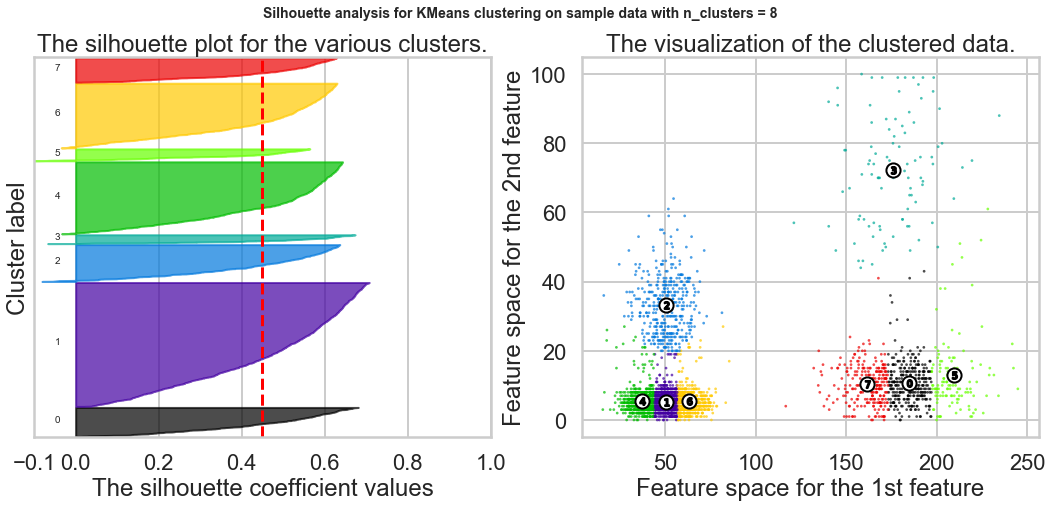

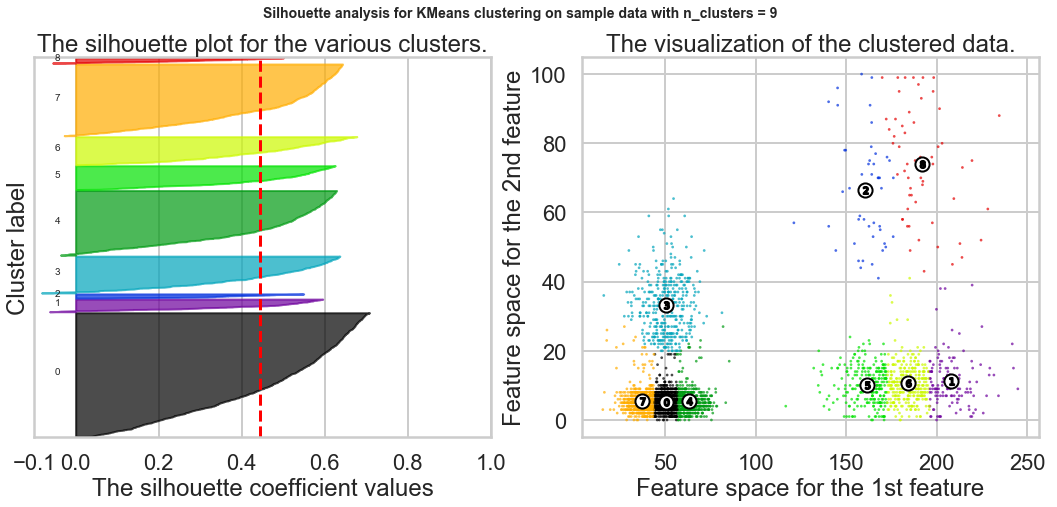

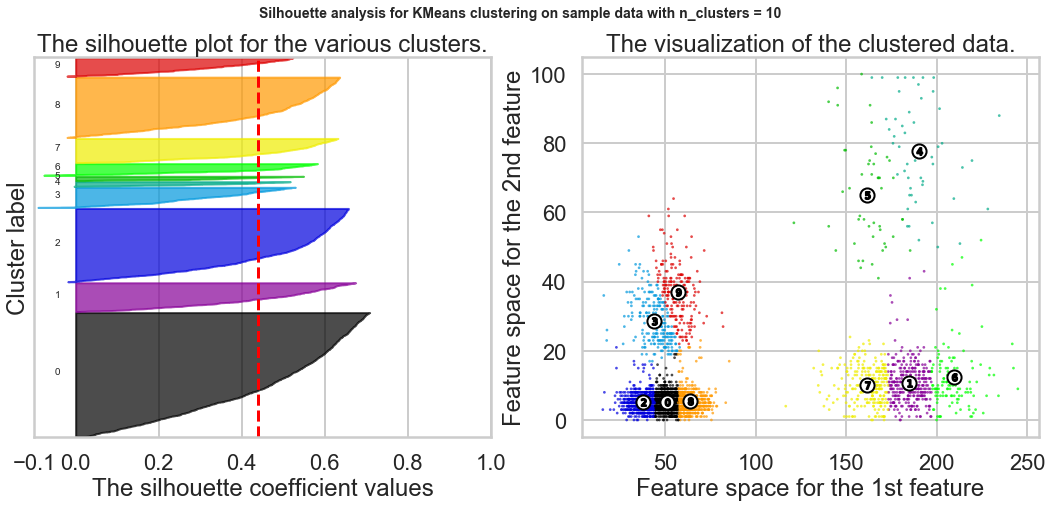

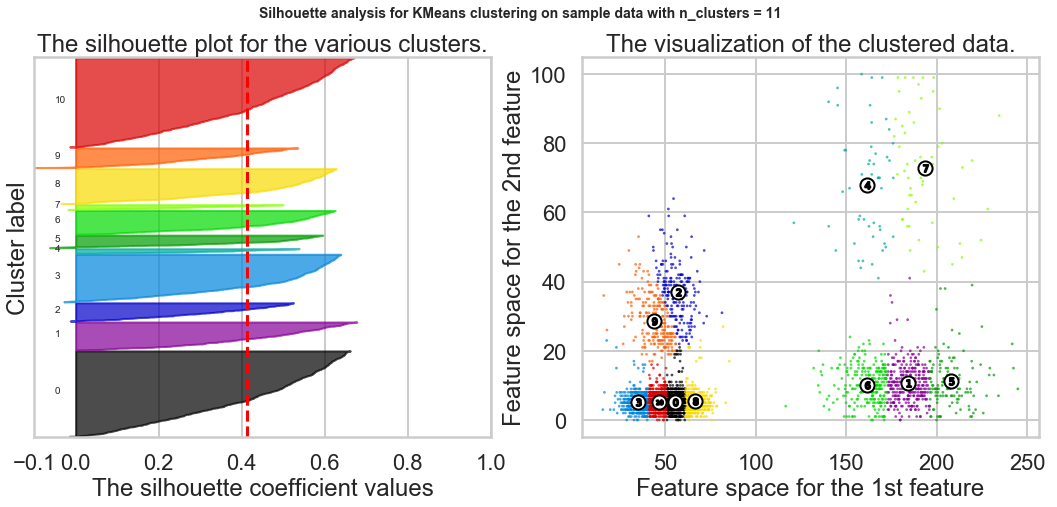

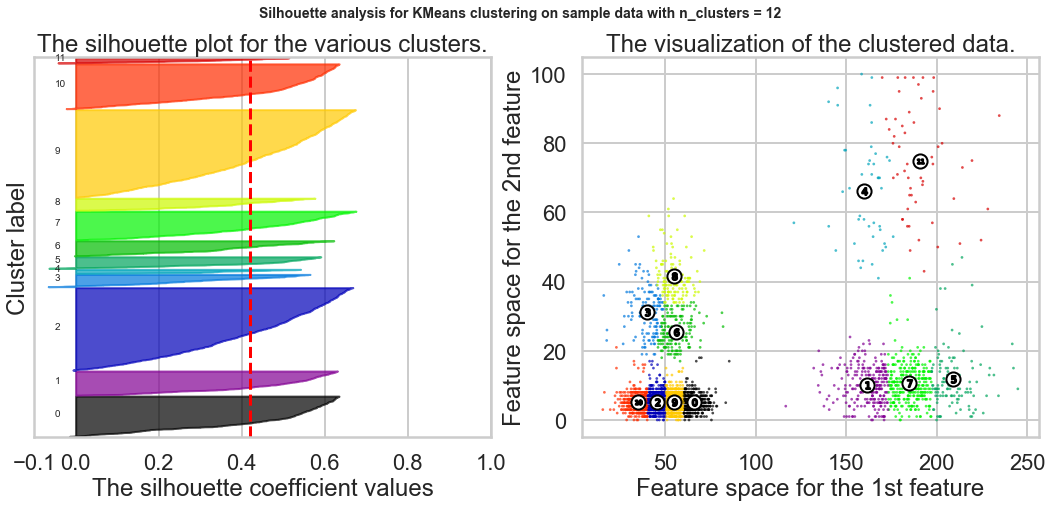

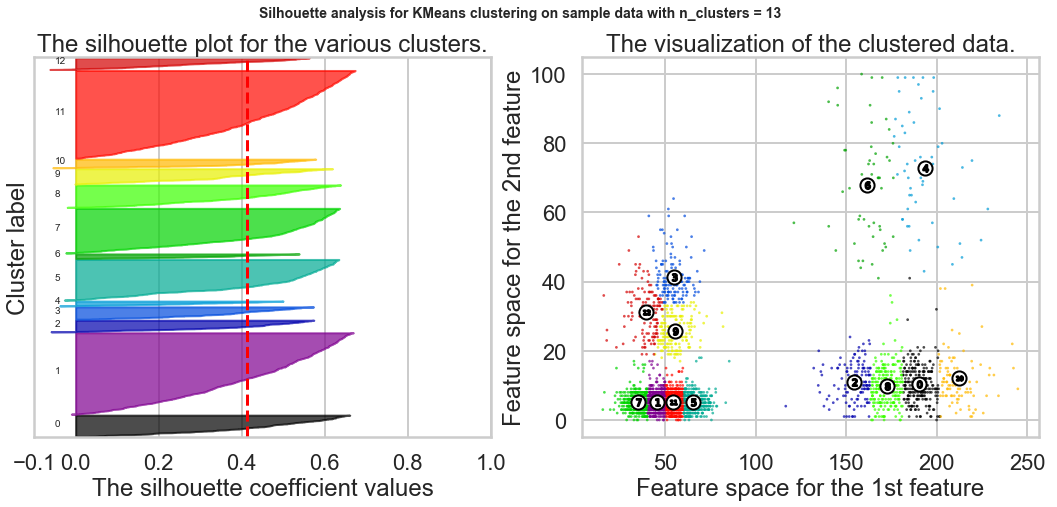

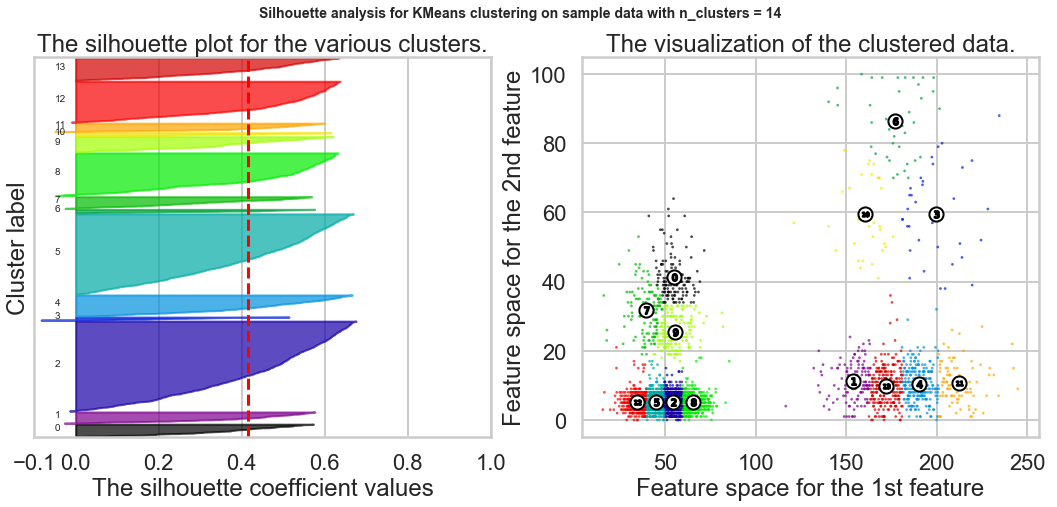

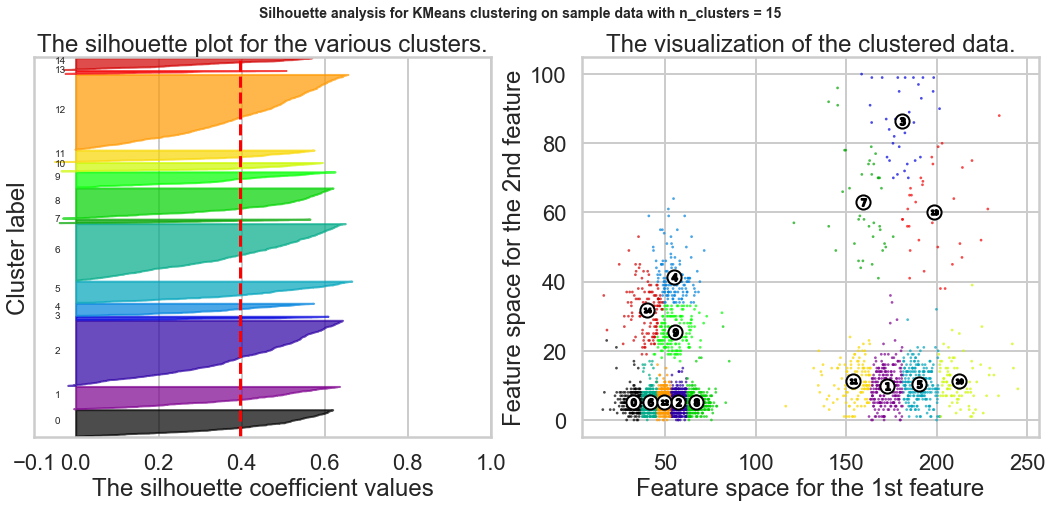

In [26]:
## Change all "X" variables to df; All changes from the original code can be found after the ###---### comments.

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ### --- ###
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    
    ### --- ###
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    ### --- ###
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    ### --- ###
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ### --- ### 
    ax2.scatter(df.Distance_Feature, df.Speeding_Feature, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()